In [107]:
# Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from collections import Counter
from itertools import combinations
from scipy.stats import fisher_exact
from scipy.stats import chi2_contingency

In [65]:
# Load the data from the CSV files
overall_paragraphs = pd.read_csv('/Users/dgkamper/DGK_Lab/Collaborations/Intellectual Humility/middlepeople/Dataset/OverallParagraphs.csv')

# Check Upload
(overall_paragraphs.head())

,ID,Paragraph
0,1,Defunding the police is important to me becaus...
1,2,I am pro choice. A person with a uterus’ body ...
2,4,Standardized testing is important. It helps pr...
3,5,I chose the legalization of abortion. I fully ...
4,6,I personally believe that people should be vac...


In [66]:
# Developing Topics 
## Keywords

keywords = {
    'Vaccines': ["vaccine", "vaccines", "vaccinated", "vaccination", "immunization"],
    'Abortion': ["abortion", "pro-choice", "pro-life", "reproductive rights", "pregnancy", "births"],
    'Police': ["police", "defund", "law enforcement", "policing"],
    'Drugs': ["drugs", "drug", "psychedelics", "opiates", "weed", "marijuana", "barbiturates", "legalization", "addiction"],
    'AffirmativeAction': ["affirmative action", "diversity", "quotas", "equal opportunity"],
    'StandardizedTests': ["standardized tests", "standardized testing", "standard tests", "SAT", "ACT", "admissions", "college administrators"]
}

## Function to classify paragraphs based on keywords
def classify_paragraph(paragraph, keywords):
    for topic, keyword_list in keywords.items():
        if any(re.search(r'\b' + re.escape(keyword) + r'\b', paragraph, re.IGNORECASE) for keyword in keyword_list):
            return topic
    return "Other"

## Apply the classification to each paragraph in the data
OverallParagraphs['Topic'] = OverallParagraphs['Paragraph'].apply(classify_paragraph, args=(keywords,))

# Count the number of paragraphs per topic
topic_counts = OverallParagraphs['Topic'].value_counts().reset_index()
topic_counts.columns = ['Topic', 'Count']

# Display the topic counts and the first few rows of the data
print(topic_counts)
print(OverallParagraphs.head())

               Topic  Count
0           Abortion    262
1             Police    139
2              Drugs    129
3           Vaccines    111
4  AffirmativeAction     68
5  StandardizedTests     63
6              Other     27
   ID                                          Paragraph              Topic  \
0   1  Defunding the police is important to me becaus...             Police   
1   2  I am pro choice. A person with a uterus’ body ...           Abortion   
2   4  Standardized testing is important. It helps pr...  StandardizedTests   
3   5  I chose the legalization of abortion. I fully ...           Abortion   
4   6  I personally believe that people should be vac...           Vaccines   

   Moral_Word_Count                            Moral_Words_By_Category  
0                10  {'AUTHORITY.VIRTUE': 6, 'LOYALTY.VIRTUE': 2, '...  
1                 3           {'SANCTITY.VIRTUE': 2, 'CARE.VIRTUE': 1}  
2                 2                                 {'CARE.VIRTUE': 2}  
3        

In [74]:
# Load Dictionary
moral_dictionary = pd.read_csv('/Users/dgkamper/DGK_Lab/Collaborations/Intellectual Humility/middlepeople/Moral Dictionary.csv')

# Clean and prepare the MoralDictionary
moral_dictionary['WORD'] = moral_dictionary['WORD'].str.extract(r'(\w+)', expand=False)
moral_dictionary.dropna(subset=['WORD'], inplace=True)

# Convert the moral dictionary into a lookup format
moral_words_set = set(moral_dictionary['WORD'].str.lower())
moral_categories = {row['WORD'].lower(): row['CATEGORY'] for index, row in moral_dictionary.iterrows()}

# Check Upload
moral_dictionary.head(), moral_dictionary['CATEGORY'].unique()

(      CATEGORY         WORD
 0  CARE.VIRTUE    ALLEVIATE
 1  CARE.VIRTUE   ALLEVIATED
 2  CARE.VIRTUE   ALLEVIATES
 3  CARE.VIRTUE  ALLEVIATING
 4  CARE.VIRTUE  ALLEVIATION,
 array(['CARE.VIRTUE', 'CARE.VICE', 'FAIRNESS.VIRTUE', 'FAIRNESS.VICE',
        'LOYALTY.VIRTUE', 'LOYALTY.VICE', 'AUTHORITY.VIRTUE',
        'AUTHORITY.VICE', 'SANCTITY.VIRTUE', 'SANCTITY.VICE'], dtype=object))

In [68]:
# Function to count moral words and categorize them in a paragraph
def count_moral_words(paragraph, moral_words_set, moral_categories):
    words = re.findall(r'\b\w+\b', paragraph.lower())  # Extract words
    counts = Counter(word for word in words if word in moral_words_set)
    # Aggregate counts by moral categories
    category_counts = Counter()
    for word, count in counts.items():
        category = moral_categories.get(word, "Other")
        category_counts[category] += count
    return counts, category_counts

# Apply the function to each paragraph and add results to the overall_paragraphs
overall_paragraphs['MoralCounts'] = overall_paragraphs['Paragraph'].apply(lambda x: count_moral_words(x, moral_words_set, moral_categories)[0])
overall_paragraphs['CategoryCounts'] = overall_paragraphs['Paragraph'].apply(lambda x: count_moral_words(x, moral_words_set, moral_categories)[1])

# Check the updated DataFrame
overall_paragraphs.head()
 

,ID,Paragraph,MoralCounts,CategoryCounts
0,1,Defunding the police is important to me becaus...,"{'police': 5, 'communities': 2, 'violence': 1,...","{'AUTHORITY.VIRTUE': 6, 'LOYALTY.VIRTUE': 2, '..."
1,2,I am pro choice. A person with a uterus’ body ...,"{'body': 2, 'healthcare': 1}","{'SANCTITY.VIRTUE': 2, 'CARE.VIRTUE': 1}"
2,4,Standardized testing is important. It helps pr...,"{'helps': 1, 'help': 1}",{'CARE.VIRTUE': 2}
3,5,I chose the legalization of abortion. I fully ...,"{'safety': 1, 'rights': 1, 'care': 1, 'health'...","{'CARE.VIRTUE': 3, 'FAIRNESS.VIRTUE': 1}"
4,6,I personally believe that people should be vac...,"{'family': 1, 'safe': 1}","{'LOYALTY.VIRTUE': 1, 'CARE.VIRTUE': 1}"


In [108]:
# Classify Paragraphs

# Function to classify paragraphs based on keywords (using prior keywords dictionary)
def classify_paragraph(paragraph, keywords):
    for topic, keyword_list in keywords.items():
        if any(re.search(r'\b' + re.escape(keyword) + r'\b', paragraph, re.IGNORECASE) for keyword in keyword_list):
            return topic
    return "Other"

# Apply the classification to each paragraph in the data
overall_paragraphs['Topic'] = overall_paragraphs['Paragraph'].apply(classify_paragraph, args=(keywords,))

# Group the data by topic and sum the category counts
def aggregate_counts(x):
    total_counts = Counter()
    for count in x:
        total_counts.update(count)
    return total_counts

# Aggregate counts by topics
# topic_moral_summary_category = overall_paragraphs.groupby('Topic')['CategoryCounts'].agg(aggregate_counts).reset_index()

# Sum the total moral words for each paragraph
# overall_paragraphs['TotalMoralWords'] = overall_paragraphs['MoralCounts'].apply(lambda counts: sum(counts.values()))

# Aggregate the total moral words by topic
# total_moral_words_by_topic = overall_paragraphs.groupby('Topic')['TotalMoralWords'].sum().sort_values()

overall_paragraphs['Topic'] = overall_paragraphs['Paragraph'].apply(classify_paragraph, args=(keywords,))

# Aggregate the total moral words by topic without sorting by sum
total_moral_words_by_topic = overall_paragraphs.groupby('Topic')['TotalMoralWords'].sum().reset_index()

# Sort the DataFrame by 'Topic' alphabetically for plotting
total_moral_words_by_topic_sorted = total_moral_words_by_topic.sort_values(by='Topic')

# Display the summarized moral counts by topic
print(topic_moral_summary_category)
print(total_moral_words_by_category)

               Topic                                     CategoryCounts
0           Abortion  {'SANCTITY.VIRTUE': 194, 'CARE.VIRTUE': 455, '...
1  AffirmativeAction  {'LOYALTY.VIRTUE': 48, 'CARE.VICE': 12, 'FAIRN...
2              Drugs  {'AUTHORITY.VIRTUE': 33, 'SANCTITY.VICE': 500,...
3              Other  {'SANCTITY.VIRTUE': 11, 'AUTHORITY.VIRTUE': 5,...
4             Police  {'AUTHORITY.VIRTUE': 486, 'LOYALTY.VIRTUE': 81...
5  StandardizedTests  {'CARE.VIRTUE': 27, 'LOYALTY.VIRTUE': 10, 'CAR...
6           Vaccines  {'LOYALTY.VIRTUE': 40, 'CARE.VIRTUE': 106, 'SA...
Topic
Other                  56
StandardizedTests      72
AffirmativeAction     216
Vaccines              428
Drugs                 880
Police                888
Abortion             1373
Name: TotalMoralWords, dtype: int64


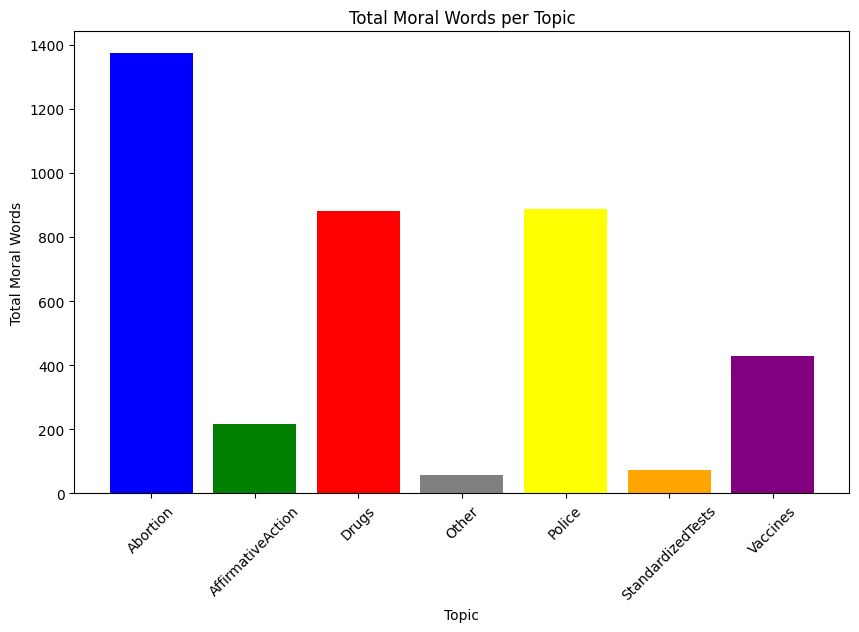

In [104]:
# Plot
plt.figure(figsize=(10, 6))
plt.bar(total_moral_words_by_topic_sorted['Topic'], total_moral_words_by_topic_sorted['TotalMoralWords'], color=['blue', 'green', 'red', 'gray', 'yellow', 'orange', 'purple'])
plt.title('Total Moral Words per Topic')
plt.xlabel('Topic')
plt.ylabel('Total Moral Words')
plt.xticks(rotation=45)
plt.show()

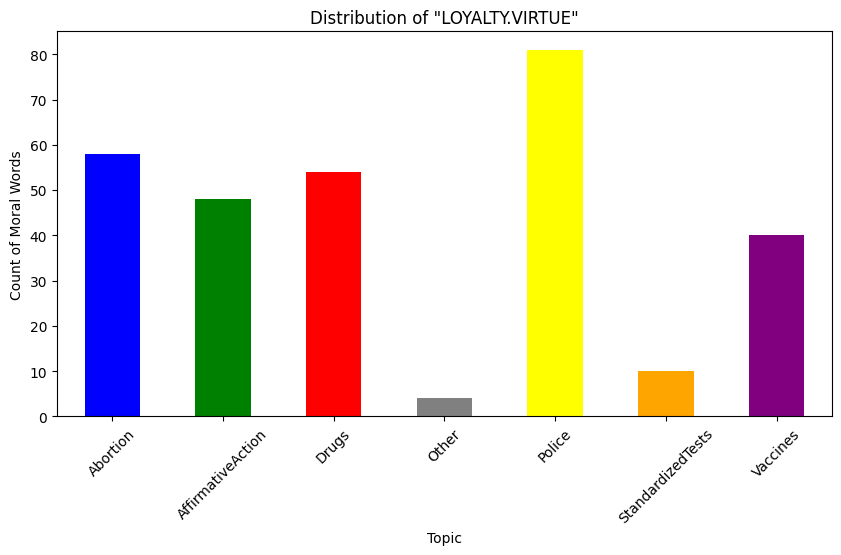

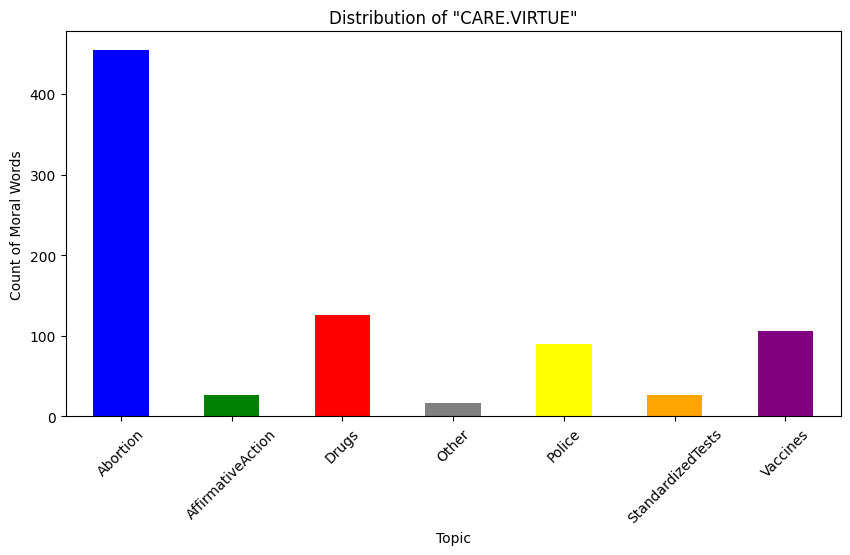

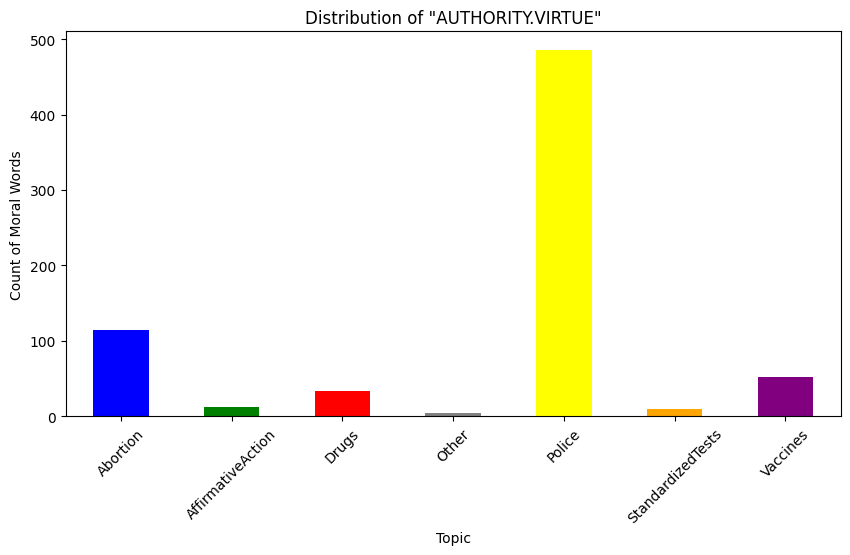

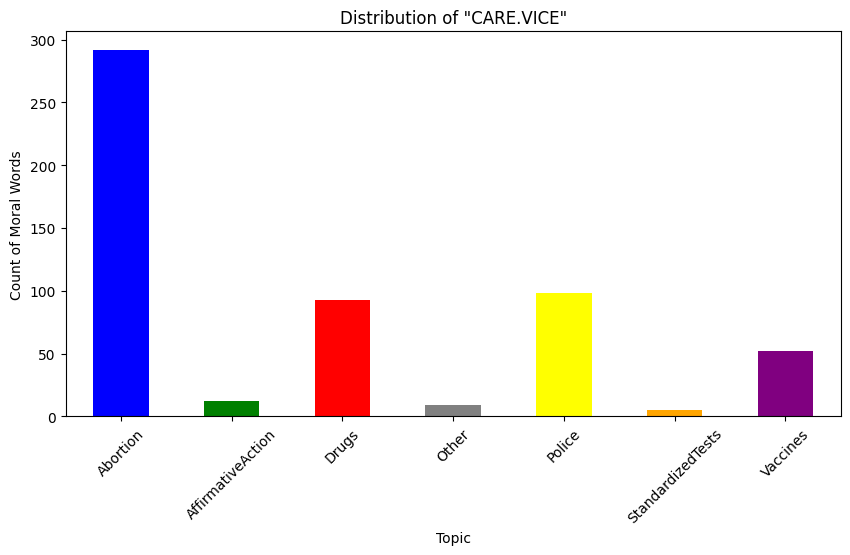

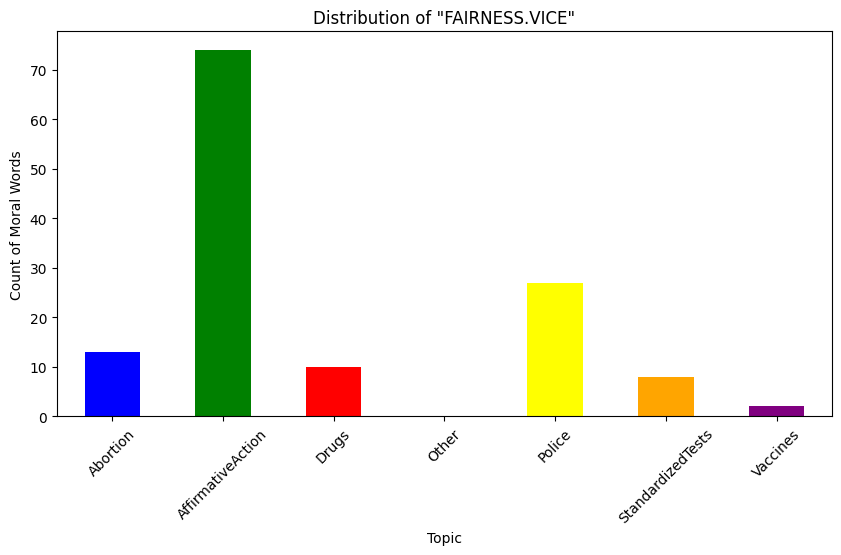

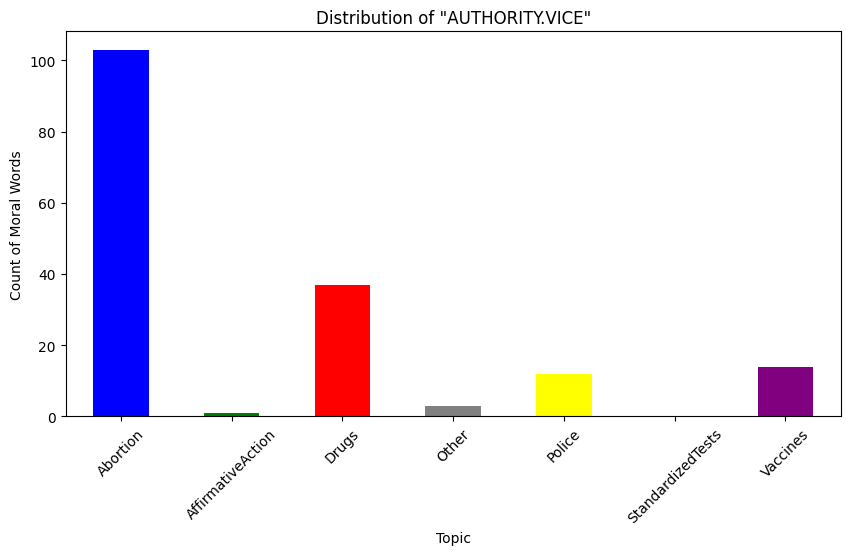

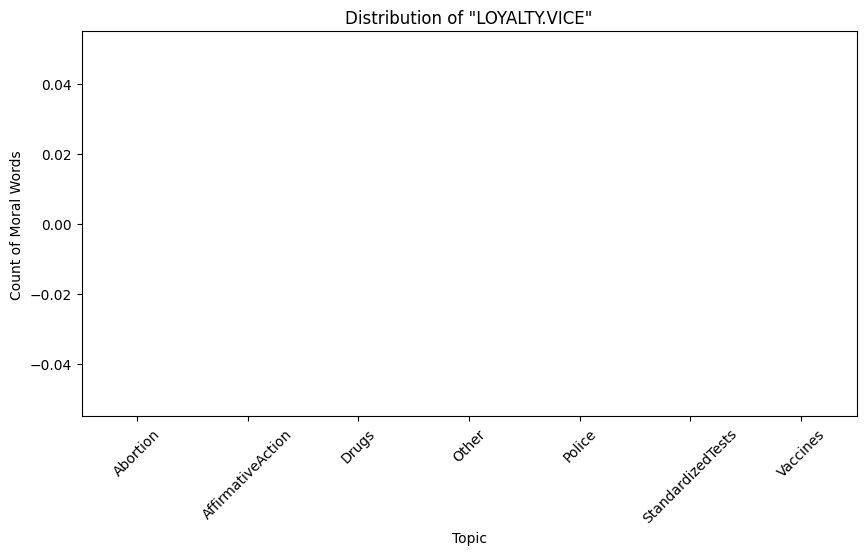

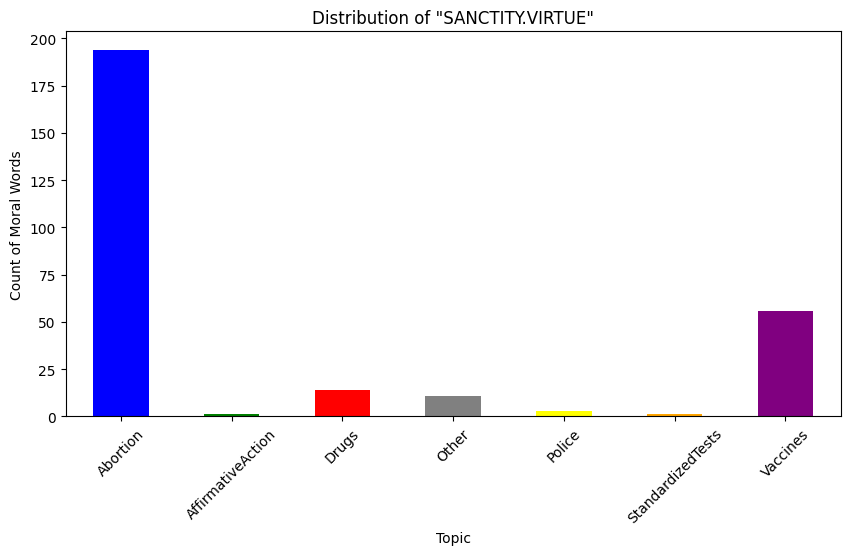

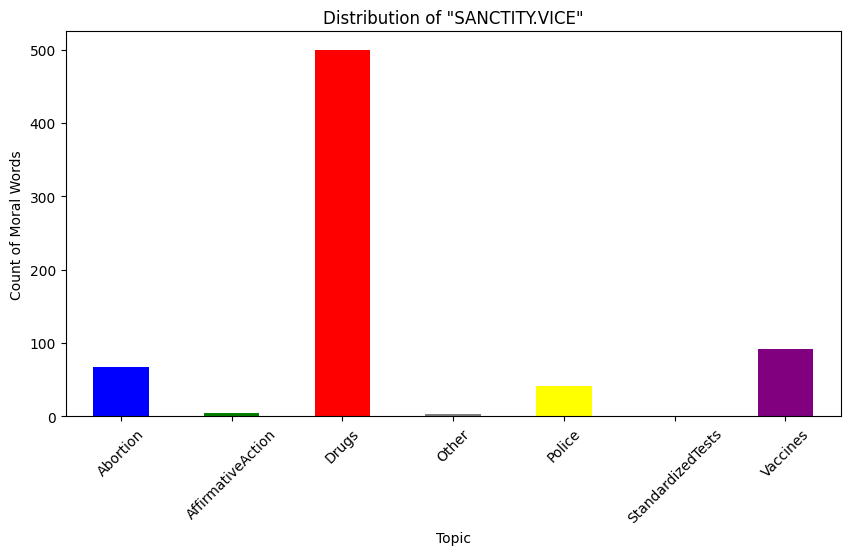

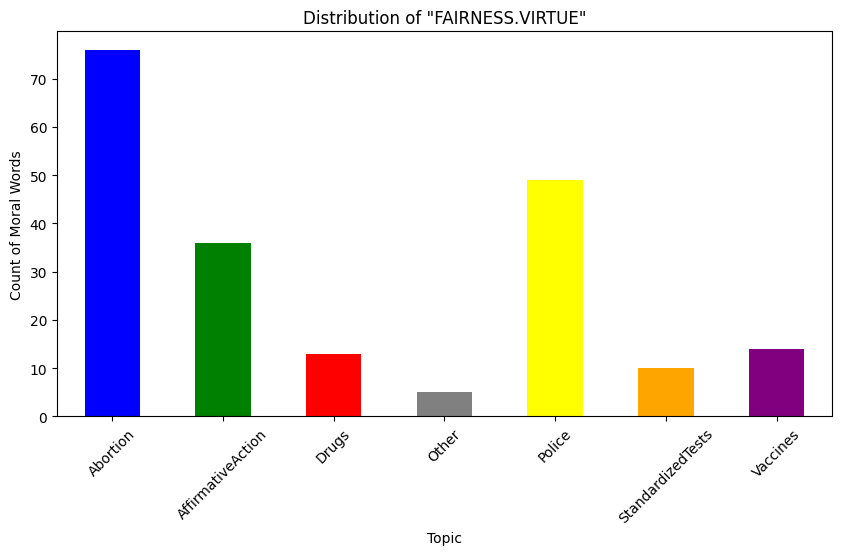

In [97]:
# Moral words in paragraphs using the updated moral dictionary
overall_paragraphs['MoralCounts'] = overall_paragraphs['Paragraph'].apply(lambda x: count_moral_words(x, moral_words_set, moral_categories)[0])
overall_paragraphs['CategoryCounts'] = overall_paragraphs['Paragraph'].apply(lambda x: count_moral_words(x, moral_words_set, moral_categories)[1])

# Aggregate counts by topics again using the updated dictionary
topic_moral_summary = overall_paragraphs.groupby('Topic')['CategoryCounts'].agg(aggregate_counts).reset_index()

# Update category data for plotting using the updated dictionary
category_data = {topic: counts for topic, counts in zip(topic_moral_summary['Topic'], topic_moral_summary['CategoryCounts'])}
all_categories = set(moral_dictionary['CATEGORY'])

# Ensure all categories are present in the DataFrame used for plotting, initialize to zero if absent
categories_df = pd.DataFrame.from_dict(category_data, orient='index').fillna(0)
for category in all_categories:
    if category not in categories_df.columns:
        categories_df[category] = 0

# Generate individual plots for each moral category across topics, ensuring all categories are included

colors = ['blue', 'green', 'red', 'gray', 'yellow','orange', 'purple']

for category in all_categories:
    plt.figure(figsize=(10, 5))
    categories_df[category].plot(kind='bar', color=colors)
    plt.title(f'Distribution of "{category}"')
    plt.xlabel('Topic')
    plt.ylabel('Count of Moral Words')
    plt.xticks(rotation=45)
    plt.grid(False)
    plt.show()

In [85]:
# Prepare a contingency table where each row represents a topic and each column a moral category
contingency_table = pd.DataFrame.from_dict({topic: data for topic, data in zip(topic_moral_summary['Topic'], topic_moral_summary['CategoryCounts'])}).fillna(0)

# Perform the Chi-squared test
chi_squared_result = chi2_contingency(contingency_table)

chi_squared_result

Chi2ContingencyResult(statistic=3258.152839950559, pvalue=0.0, dof=48, expected_freq=array([[ 98.24686941,  15.45617174,  62.96958855,   4.00715564,
         63.54203936,   5.15205725,  30.62611807],
       [297.19677996,  46.7549195 , 190.48300537,  12.1216458 ,
        192.21466905,  15.58497317,  92.64400716],
       [ 71.22898032,  11.20572451,  45.6529517 ,   2.90518784,
         46.06797853,   3.7352415 ,  22.2039356 ],
       [ 59.649885  ,   9.38410427,  38.23153591,   2.43291592,
         38.57909532,   3.12803476,  18.59442883],
       [103.51009456,  16.28418094,  66.34295937,   4.22182469,
         66.94607718,   5.42806031,  32.26680296],
       [250.17863532,  39.35803731, 160.34755942,  10.2039356 ,
        161.8052645 ,  13.11934577,  77.98722208],
       [196.8446205 ,  30.96754408, 126.16406849,   8.02862254,
        127.31101457,  10.32251469,  61.36161513],
       [249.12599029,  39.19243547, 159.67288525,  10.16100179,
        161.12445694,  13.06414516,  77.659085

In [105]:
# Function to perform Fisher's Exact Test for any given moral category
def perform_fishers_exact_test_for_category(categories_df, category):
    results = {}
    topics = categories_df.index.unique()
    
    for topic1, topic2 in combinations(topics, 2):
        # Extract counts for the given category for the pair
        category_counts = categories_df.loc[[topic1, topic2], category]
        # Calculate non-category counts by subtracting category counts from total counts for each topic
        total_counts = categories_df.loc[[topic1, topic2]].sum(axis=1)
        non_category_counts = total_counts - category_counts
        
        # Construct 2x2 contingency table
        contingency_table = np.array([category_counts, non_category_counts]).T
        
        # Perform Fisher's Exact Test on this 2x2 table
        oddsratio, p_value = fisher_exact(contingency_table)
        results[(topic1, topic2)] = (oddsratio, p_value)

    return results

In [106]:
category_to_test = "CARE.VIRTUE"  # Change to other category as needed
test_results = perform_fishers_exact_test_for_category(categories_df, category_to_test)
print(test_results)

{('Abortion', 'AffirmativeAction'): (3.469498910675381, 9.9087089370589e-11), ('Abortion', 'Drugs'): (2.965988864681675, 1.705633460544281e-24), ('Abortion', 'Other'): (1.2391067538126361, 0.5625371701928346), ('Abortion', 'Police'): (4.394698620188816, 1.0151374038335688e-38), ('Abortion', 'StandardizedTests'): (0.8260711692084242, 0.4440216223750837), ('Abortion', 'Vaccines'): (1.5056316027459202, 0.0010074454432958424), ('AffirmativeAction', 'Drugs'): (0.854875283446712, 0.5837349566609095), ('AffirmativeAction', 'Other'): (0.35714285714285715, 0.006555938964149443), ('AffirmativeAction', 'Police'): (1.2666666666666666, 0.32430613886537696), ('AffirmativeAction', 'StandardizedTests'): (0.23809523809523808, 8.57899642751393e-06), ('AffirmativeAction', 'Vaccines'): (0.4339622641509434, 0.00028304271703797793), ('Drugs', 'Other'): (0.4177718832891247, 0.006822753803614941), ('Drugs', 'Police'): (1.4816976127320955, 0.00881866256784797), ('Drugs', 'StandardizedTests'): (0.27851458885941

In [ ]:
category_to_test = "CARE.VIRTUE"  # Change to other category
test_results = perform_fishers_exact_test_for_category(categories_df, category_to_test)
print(test_results)